# Parsing files with ChatGPT

This Jupyter notebook is dedicated to demonstrating how ChatGPT can assist in generating code from scratch.


### Required packages

In [ ]:
!pip install beautifulsoup4
!pip install requests
!pip install pandas

### Apartments and Prices

**What to Prompt ChatGPT**:

~~~
I want to create an example where we parse the following webpage "https://www.morgantownrents.com/". I want the link, address, number of beds, number of baths, location,price and property type.
~~~


<details>
To extract data from a webpage, typically you would use web scraping techniques. The process involves sending a request to the webpage, downloading the HTML content, and then parsing it to extract the information you need. Python libraries like `requests` for fetching the content and `BeautifulSoup` for parsing the HTML are commonly used for such tasks.

However, in the environment we're in now, I cannot access external web pages directly since the browsing capability is disabled. But I can guide you through the code you would need to use on your local machine to scrape the data from the website you mentioned.

Keep in mind that web scraping must comply with the website's `robots.txt` file and terms of service. Always check these to ensure that you're allowed to scrape the website, and be respectful of the server by not sending too many requests in a short amount of time.

Here's an example of what the Python code using `requests` and `BeautifulSoup` could look like:

```python
import requests
from bs4 import BeautifulSoup

url = 'https://www.morgantownrents.com/'

headers = {
    'User-Agent': 'Your User Agent'
}

response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    html = response.content
    soup = BeautifulSoup(html, 'html.parser')

    # Assuming the data is structured within HTML, you would look for the specific
    # tags that contain the information you need and loop through them.
    # For example:
    listings = soup.find_all('div', class_='listing')  # This class name is hypothetical
    for listing in listings:
        link = listing.find('a')['href']
        address = listing.find('span', class_='address').text  # Hypothetical class names
        beds = listing.find('span', class_='beds').text
        baths = listing.find('span', class_='baths').text
        location = listing.find('span', class_='location').text
        price = listing.find('span', class_='price').text
        property_type = listing.find('span', class_='property-type').text
        
        # Print or process the extracted data
        print(f'Link: {link}')
        print(f'Address: {address}')
        print(f'Beds: {beds}')
        print(f'Baths: {baths}')
        print(f'Location: {location}')
        print(f'Price: {price}')
        print(f'Property Type: {property_type}')
        print('----------------------')
else:
    print(f'Failed to retrieve the webpage. Status code: {response.status_code}')
```

This is a generic template. You would need to inspect the HTML structure of "https://www.morgantownrents.com/" and adjust the `soup.find_all()` and `listing.find()` methods to match the actual HTML tags and classes or ids used on the website.

Would you like to write a script using the correct selectors for this website, or do you need help with something else?
</details>

In [2]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.morgantownrents.com/'

headers = {
    'User-Agent': 'Your User Agent'
}

response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    html = response.content
    soup = BeautifulSoup(html, 'html.parser')

    # Assuming the data is structured within HTML, you would look for the specific
    # tags that contain the information you need and loop through them.
    # For example:
    listings = soup.find_all('div', class_='listing')  # This class name is hypothetical
    if not listings:
        print("Found no listings")

    for listing in listings:
        link = listing.find('a')['href']
        address = listing.find('span', class_='address').text  # Hypothetical class names
        beds = listing.find('span', class_='beds').text
        baths = listing.find('span', class_='baths').text
        location = listing.find('span', class_='location').text
        price = listing.find('span', class_='price').text
        property_type = listing.find('span', class_='property-type').text
        
        # Print or process the extracted data
        print(f'Link: {link}')
        print(f'Address: {address}')
        print(f'Beds: {beds}')
        print(f'Baths: {baths}')
        print(f'Location: {location}')
        print(f'Price: {price}')
        print(f'Property Type: {property_type}')
        print('----------------------')
else:
    print(f'Failed to retrieve the webpage. Status code: {response.status_code}')


Found no listings


**What to Prompt ChatGPT**:

~~~
Here is a snipit of the html where they begin listing apartments. I want the link, address, number of beds, number of baths, location,price and property type. Modify the previous code to parse this information. I want the information in the form of a list of dictionaries where the keys and values are the information I want. Perform an example to show the parsing is working.

<p>&nbsp;</p>
<h2><a href="https://www.morgantownrents.com/availability/currently-available/">Apartments Available Now (November 2023)</a></h2>
<div class="display-posts-listing row">  <article id="post_11822" class="col-sm-6 col-lg-6 col-xl-4"> 
      <!-- Begin Listing: 750 Snider St., Apt. #1 -->
      <div class="property-listing">
          <div class="media row">
          	<div class="col-3" style="padding-right:0;">
              <a class="" href="https://www.morgantownrents.com/750-snider-st-apt-1/">
              	<img alt="750 Snider St., Apt. #1" src="https://www.morgantownrents.com/wp-content/uploads/2019/03/750snider-170x150.jpeg" class="size-auto">
              </a>
            </div>
          	<div class="col-9" style="padding-right:0;padding-left:10px;">
              <div class=" media-body fnt-smaller">
                  <a href="https://www.morgantownrents.com/750-snider-st-apt-1/"></a>

								<h5 class="media-heading mrg-0"><a href="https://www.morgantownrents.com/750-snider-st-apt-1/">750 Snider St., Apt. #1 <span>$1275</span></a></h5>

                  <ul class="list-inline mrg-0 clr-535353">
                    <li class="list-inline-item badge badge-pill badge-secondary">3 Beds</li>
                    <li class="list-inline-item badge badge-pill badge-secondary">1 Baths</li>
                    <li class="list-inline-item badge badge-pill badge-secondary">Duplex</li>
                                                                                <li class="list-inline-item badge badge-pill badge-secondary">Morgantown, WV</li>
                </ul>
              </div>
          </div>
      </div></div></article><!-- End Listing-->    <article id="post_11704" class="col-sm-6 col-lg-6 col-xl-4"> 
      <!-- Begin Listing: 14 McLane Ave., Apt. #1 -->
      <div class="property-listing">
          <div class="media row">
          	<div class="col-3" style="padding-right:0;">
              <a class="" href="https://www.morgantownrents.com/14-mclane-ave-apt-1/">
              	<img alt="14 McLane Ave., Apt. #1" src="https://www.morgantownrents.com/wp-content/uploads/2018/10/14mclane-170x150.jpg" class="size-auto">
              </a>
            </div>
          	<div class="col-9" style="padding-right:0;padding-left:10px;">
              <div class=" media-body fnt-smaller">
                  <a href="https://www.morgantownrents.com/14-mclane-ave-apt-1/"></a>

								<h5 class="media-heading mrg-0"><a href="https://www.morgantownrents.com/14-mclane-ave-apt-1/">14 McLane Ave., Apt. #1 <span>$2675</span></a></h5>

                  <ul class="list-inline mrg-0 clr-535353">
                    <li class="list-inline-item badge badge-pill badge-secondary">5 Beds</li>
                    <li class="list-inline-item badge badge-pill badge-secondary">2 Baths</li>
                    <li class="list-inline-item badge badge-pill badge-secondary">Apartment / House</li>
                                                                                <li class="list-inline-item badge badge-pill badge-secondary">Morgantown, WV</li>
                </ul>
              </div>
          </div>
      </div></div></article><!-- End Listing-->    <article id="post_11759" class="col-sm-6 col-lg-6 col-xl-4"> 
~~~


<details>
Based on the HTML snippet you provided, we can parse the required information and store it in a list of dictionaries. Each dictionary will represent a property listing with keys for link, address, beds, baths, location, price, and property type.

Here's how you would modify the code to achieve that:

```python
from bs4 import BeautifulSoup

# Let's assume 'html_content' is the variable that contains the HTML snippet you provided.
html_content = """
<!-- Your HTML snippet -->
"""

soup = BeautifulSoup(html_content, 'html.parser')

# Find all article tags, as each one seems to represent a property listing.
articles = soup.find_all('article')

# Initialize an empty list to hold all property dictionaries
properties_list = []

for article in articles:
    # Dictionary to store the information for each property
    property_dict = {}

    # Extract the link
    link_tag = article.find('a')
    property_dict['link'] = link_tag['href']

    # Extract the address and price within the h5 tag
    h5_tag = article.find('h5', class_='media-heading')
    address_price = h5_tag.get_text(strip=True).split('$')
    property_dict['address'] = address_price[0].strip()
    property_dict['price'] = f'${address_price[1]}'

    # Extract the list items, which contain beds, baths, and property type
    list_items = article.find_all('li', class_='list-inline-item')
    for item in list_items:
        text = item.get_text(strip=True)
        if 'Beds' in text:
            property_dict['beds'] = text
        elif 'Baths' in text:
            property_dict['baths'] = text
        elif 'Apartment' in text or 'Duplex' in text or 'House' in text:
            property_dict['property_type'] = text
        else:
            property_dict['location'] = text

    # Append the property dictionary to the list
    properties_list.append(property_dict)

# Print the list of dictionaries
for property in properties_list:
    print(property)
```

This code will output the list of dictionaries where each dictionary contains the information for one property listing. You would replace the `html_content` variable with the actual HTML content that you have fetched from the webpage. The keys in the dictionaries correspond to the data items you're interested in.

Would you like to proceed with this example, or do you need the code to be run in a specific way?
</details>

In [3]:

# The URL of the apartments listing page
url = 'https://www.morgantownrents.com/'
# url = 'https://www.manchin.senate.gov/newsroom/press-releases'
# Send a GET request to the page
response = requests.get(url)

# Correcting the parsing logic to find the 'property-listing' within each article tag

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Initialize an empty list to hold all property dictionaries
properties_list = []

# Find all article tags, as each one seems to represent a property listing.
articles = soup.find_all('article')

for article in articles:
    # Dictionary to store the information for each property
    property_dict = {}

    # Extract the link
    link_tag = article.find('a')
    property_dict['link'] = link_tag['href']

    # Extract the address and price within the h5 tag
    h5_tag = article.find('h5', class_='media-heading')
    address_price = h5_tag.get_text(strip=True).split('$')
    property_dict['address'] = address_price[0].strip()
    property_dict['price'] = f'${address_price[1]}'


    # Extract the list items, which contain beds, baths, and property type
    list_items = article.find_all('li', class_='list-inline-item')
    for item in list_items:
        text = item.get_text(strip=True)
        if 'Beds' in text:
            property_dict['beds'] = text
        elif 'Baths' in text:
            property_dict['baths'] = text
        elif 'Apartment' in text or 'Duplex' in text or 'House' in text:
            property_dict['property_type'] = text
        else:
            property_dict['location'] = text

    # Append the property dictionary to the list
    properties_list.append(property_dict)

properties_list

IndexError: list index out of range

This did not work because there was a parsing issue. This is usually caused by a rare case that did not follow the same format used in the listing. Let's add a try and except block to avoid these issues.

```python
try:
    property_dict['price'] = f'${address_price[1]}'
except:
    property_dict['price'] = f'NaN'
```

In [4]:
# The URL of the apartments listing page
url = 'https://www.morgantownrents.com/'

# Send a GET request to the page
response = requests.get(url)

# Correcting the parsing logic to find the 'property-listing' within each article tag

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Initialize an empty list to hold all property dictionaries
properties_list = []

# Find all article tags, as each one seems to represent a property listing.
articles = soup.find_all('article')

for article in articles:
    # Dictionary to store the information for each property
    property_dict = {}

    # Extract the link
    link_tag = article.find('a')
    property_dict['link'] = link_tag['href']

    # Extract the address and price within the h5 tag
    h5_tag = article.find('h5', class_='media-heading')
    address_price = h5_tag.get_text(strip=True).split('$')
    property_dict['address'] = address_price[0].strip()

    try:
        property_dict['price'] = f'${address_price[1]}'
    except:
        property_dict['price'] = f'NaN'

    # Extract the list items, which contain beds, baths, and property type
    list_items = article.find_all('li', class_='list-inline-item')
    for item in list_items:
        text = item.get_text(strip=True)
        if 'Beds' in text:
            property_dict['beds'] = text
        elif 'Baths' in text:
            property_dict['baths'] = text
        elif 'Apartment' in text or 'Duplex' in text or 'House' in text:
            property_dict['property_type'] = text
        else:
            property_dict['location'] = text

    # Append the property dictionary to the list
    properties_list.append(property_dict)

properties_list

[{'link': '/apartments/',
  'address': '604 Grant Ave.',
  'price': '$2200',
  'beds': '6 Beds',
  'baths': '3 Baths',
  'property_type': 'Duplex',
  'location': 'Morgantown, WV'},
 {'link': 'https://www.morgantownrents.com/604-grant-ave/',
  'address': '604 Grant Ave.',
  'price': '$2200',
  'beds': '4 Beds',
  'baths': '1 Baths',
  'property_type': 'House',
  'location': 'Morgantown, WV'},
 {'link': 'https://www.morgantownrents.com/1113-college-ave-apt-18/',
  'address': '1113 College Ave., Apt. #18',
  'price': '$480',
  'location': 'Morgantown, WV',
  'property_type': 'Apartment / House'},
 {'link': 'https://www.morgantownrents.com/529-mclane-ave-apt-c/',
  'address': '529 McLane Ave., Apt. C',
  'price': '$1650',
  'beds': '3 Beds',
  'location': 'Morgantown, WV',
  'property_type': 'Apartment / House'},
 {'link': 'https://www.morgantownrents.com/736-grant-ave-apt-a/',
  'address': '736 Grant Ave., Apt. A',
  'price': '$565',
  'location': 'Morgantown, WV',
  'property_type': 'Apa

**What to Prompt ChatGPT**:

~~~
I want to perform some analysis on the prices, number of beds, and baths. First convert the values to a float, this will require processing their string values. Store the results in a dataframe. Then calculate the statistics of the prices, number of beds, and baths.

Here is an example list:
[{'link': '/apartments/',
  'address': '810 Locust Ave., Apt. #1',
  'price': '$425',
  'beds': '5 Beds',
  'location': 'Morgantown, WV',
  'property_type': 'Apartment / House',
  'baths': '2 Baths'},
 {'link': 'https://www.morgantownrents.com/810-locust-ave-apt-1/',
  'address': '810 Locust Ave., Apt. #1',
  'price': '$425',
  'beds': '3 Beds',
  'location': 'Fairmont, WV',
  'property_type': 'Apartment / House'},
 {'link': 'https://www.morgantownrents.com/521-mclane-ave-apt-c/',
  'address': '521 McLane Ave., Apt. C',
  'price': '$1650',
  'beds': '3 Beds',
  'location': 'Morgantown, WV',
  'property_type': 'Apartment / House'},
 {'link': 'https://www.morgantownrents.com/1113-college-ave-apt-20/',
  'address': '1113 College Ave., Apt. #20',
  'price': '$400',
  'location': 'Morgantown, WV',
  'property_type': 'Apartment / House'},
 {'link': 'https://www.morgantownrents.com/750-snider-st-apt-2/',
  'address': '750 Snider St., Apt. #2',
  'price': '$1275',
  'beds': '3 Beds',
  'baths': '1 Baths',
  'property_type': 'Duplex',
  'location': 'Morgantown, WV'},
 {'link': 'https://www.morgantownrents.com/whisper-creek-luxury-townhomes/',
  'address': 'Whisper Creek Luxury Townhomes',
  'price': '$1975',
  'beds': '3 Beds',
  'baths': '3 Baths',
  'location': 'Morgantown, WV'},
 {'link': 'https://www.morgantownrents.com/the-villages-at-west-run/',
  'address': 'The Villages at West Run',
  'price': 'NaN',
  'beds': '3 Beds',
  'baths': '2 Baths',
  'property_type': 'Apartment / Townhome',
  'location': 'Morgantown, WV'}
]
~~~


<details>
To extract data from a webpage, typically you would use web scraping techniques. The process involves sending a request to the webpage, downloading the HTML content, and then parsing it to extract the information you need. Python libraries like `requests` for fetching the content and `BeautifulSoup` for parsing the HTML are commonly used for such tasks.

However, in the environment we're in now, I cannot access external web pages directly since the browsing capability is disabled. But I can guide you through the code you would need to use on your local machine to scrape the data from the website you mentioned.

Keep in mind that web scraping must comply with the website's `robots.txt` file and terms of service. Always check these to ensure that you're allowed to scrape the website, and be respectful of the server by not sending too many requests in a short amount of time.

Here's an example of what the Python code using `requests` and `BeautifulSoup` could look like:

```python
import requests
from bs4 import BeautifulSoup

url = 'https://www.morgantownrents.com/'

headers = {
    'User-Agent': 'Your User Agent'
}

response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    html = response.content
    soup = BeautifulSoup(html, 'html.parser')

    # Assuming the data is structured within HTML, you would look for the specific
    # tags that contain the information you need and loop through them.
    # For example:
    listings = soup.find_all('div', class_='listing')  # This class name is hypothetical
    for listing in listings:
        link = listing.find('a')['href']
        address = listing.find('span', class_='address').text  # Hypothetical class names
        beds = listing.find('span', class_='beds').text
        baths = listing.find('span', class_='baths').text
        location = listing.find('span', class_='location').text
        price = listing.find('span', class_='price').text
        property_type = listing.find('span', class_='property-type').text
        
        # Print or process the extracted data
        print(f'Link: {link}')
        print(f'Address: {address}')
        print(f'Beds: {beds}')
        print(f'Baths: {baths}')
        print(f'Location: {location}')
        print(f'Price: {price}')
        print(f'Property Type: {property_type}')
        print('----------------------')
else:
    print(f'Failed to retrieve the webpage. Status code: {response.status_code}')
```

This is a generic template. You would need to inspect the HTML structure of "https://www.morgantownrents.com/" and adjust the `soup.find_all()` and `listing.find()` methods to match the actual HTML tags and classes or ids used on the website.

Would you like to write a script using the correct selectors for this website, or do you need help with something else?
</details>

In [5]:
import pandas as pd


# Convert to DataFrame
df = pd.DataFrame(properties_list)

# Correct the data cleaning functions to handle None or NaN values properly
def clean_price(price):
    try:
        return float(price.strip('$').replace(',', '')) if price and price != 'NaN' else None
    except AttributeError:  # In case price is not a string (already a float/None)
        return price

def clean_beds_baths(value):
    try:
        return float(value.split()[0]) if value and value != 'NaN' else None
    except AttributeError:  # In case value is not a string (already a float/None)
        return value

# Apply cleaning functions to the relevant columns
df['price'] = df['price'].apply(clean_price)
df['beds'] = df['beds'].apply(clean_beds_baths)
df['baths'] = df['baths'].apply(clean_beds_baths)

# Replace 'NaN' string with actual NaN values
df.replace('NaN', pd.NA, inplace=True)

# Calculate statistics for price, beds, and baths
price_stats = df['price'].describe()
beds_stats = df['beds'].describe()
baths_stats = df['baths'].describe()

(price_stats, beds_stats, baths_stats)

ValueError: could not convert string to float: '695 - '

This error is cause by a listing price having a '-' in the string. We can fix this by removing '-

In [6]:
import pandas as pd


# Convert to DataFrame
df = pd.DataFrame(properties_list)

# Correct the data cleaning functions to handle None or NaN values properly
def clean_price(price):
    try:
        return float(price.strip('$').replace(',', '').replace('-','')) if price and price != 'NaN' else None
    except AttributeError:  # In case price is not a string (already a float/None)
        return price

def clean_beds_baths(value):
    try:
        return float(value.split()[0]) if value and value != 'NaN' else None
    except AttributeError:  # In case value is not a string (already a float/None)
        return value

# Apply cleaning functions to the relevant columns
df['price'] = df['price'].apply(clean_price)
df['beds'] = df['beds'].apply(clean_beds_baths)
df['baths'] = df['baths'].apply(clean_beds_baths)

# Replace 'NaN' string with actual NaN values
df.replace('NaN', pd.NA, inplace=True)

# Calculate statistics for price, beds, and baths
price_stats = df['price'].describe()
beds_stats = df['beds'].describe()
baths_stats = df['baths'].describe()

(price_stats, beds_stats, baths_stats)

(count     121.000000
 mean     1042.396694
 std       716.275988
 min       345.000000
 25%       495.000000
 50%       800.000000
 75%      1425.000000
 max      4375.000000
 Name: price, dtype: float64,
 count    94.000000
 mean      2.904255
 std       1.098084
 min       2.000000
 25%       2.000000
 50%       3.000000
 75%       3.000000
 max       7.000000
 Name: beds, dtype: float64,
 count    32.000000
 mean      2.062500
 std       0.840027
 min       1.000000
 25%       1.750000
 50%       2.000000
 75%       2.250000
 max       4.000000
 Name: baths, dtype: float64)

**What to Prompt ChatGPT**:

~~~
Now, I want to see a scatter plot of price vs beds.
~~~


<details>
import matplotlib.pyplot as plt

# Create a scatter plot of price vs beds
plt.figure(figsize=(10, 6))
plt.scatter(df['beds'], df['price'], color='blue', alpha=0.5)

# Add titles and labels
plt.title('Price vs. Number of Beds')
plt.xlabel('Number of Beds')
plt.ylabel('Price (USD)')

# Show the plot
plt.grid(True)
plt.show()

</details>

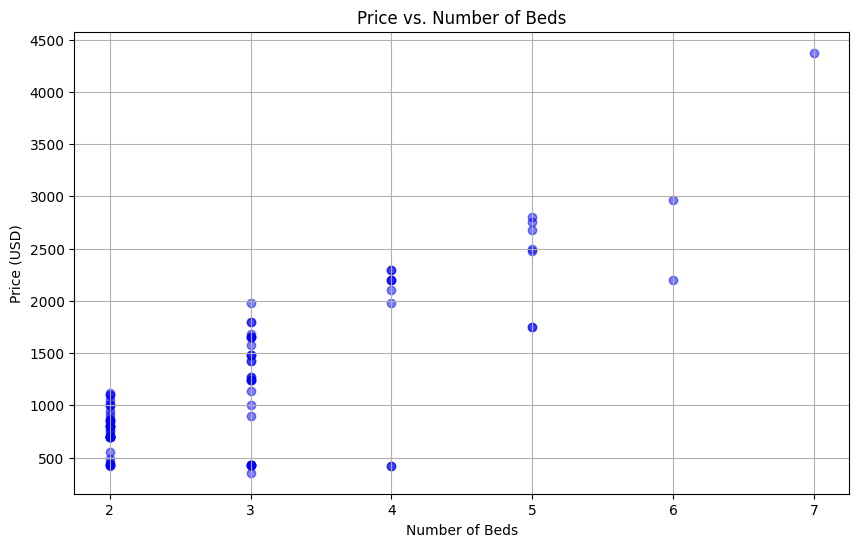

In [7]:
import matplotlib.pyplot as plt

# Create a scatter plot of price vs beds
plt.figure(figsize=(10, 6))
plt.scatter(df['beds'], df['price'], color='blue', alpha=0.5)

# Add titles and labels
plt.title('Price vs. Number of Beds')
plt.xlabel('Number of Beds')
plt.ylabel('Price (USD)')

# Show the plot
plt.grid(True)
plt.show()

**What to Prompt ChatGPT**:

~~~
Now, I want the same scatter plot but differentiate the locations but color. Give each unique location a unique color
~~~


<details>
It seems I forgot to import the `numpy` library which is needed for generating a sequence of colors. Let me correct that and recreate the scatter plot with different colors for each unique location.

The updated scatter plot now shows the relationship between the number of beds and the price, with each point color-coded according to its location. Each location has a unique color, making it easier to see how the properties are distributed across different locations in terms of price and bed count.

import numpy as np

# Map each unique location to a unique color
locations = df['location'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(locations)))
color_dict = dict(zip(locations, colors))

# Create a scatter plot of price vs beds with colors representing different locations
plt.figure(figsize=(10, 6))

for location in locations:
    # Filter the DataFrame by location and plot
    location_df = df[df['location'] == location]
    plt.scatter(location_df['beds'], location_df['price'], color=color_dict[location], alpha=0.5, label=location)

# Add titles and labels
plt.title('Price vs. Number of Beds by Location')
plt.xlabel('Number of Beds')
plt.ylabel('Price (USD)')
plt.legend(title='Location')

# Show the plot with a grid
plt.grid(True)
plt.show()

</details>

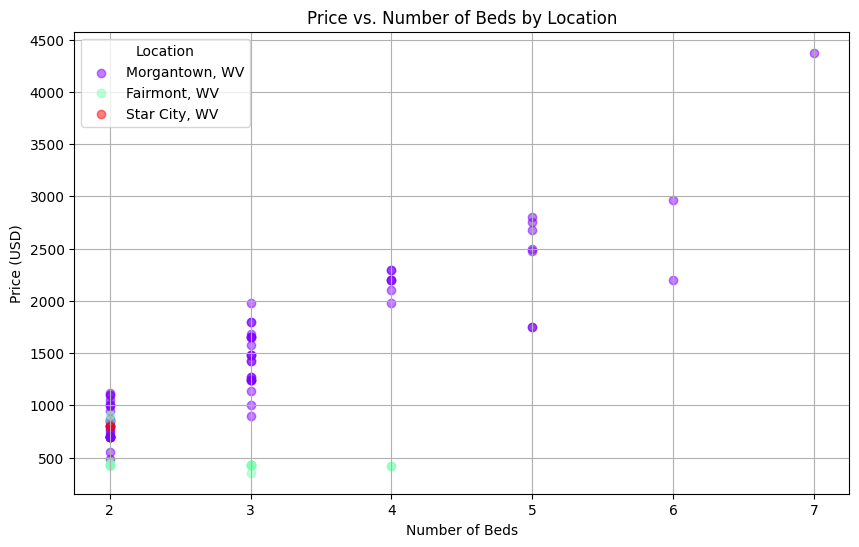

In [8]:
import numpy as np

# Map each unique location to a unique color
locations = df['location'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(locations)))
color_dict = dict(zip(locations, colors))

# Create a scatter plot of price vs beds with colors representing different locations
plt.figure(figsize=(10, 6))

for location in locations:
    # Filter the DataFrame by location and plot
    location_df = df[df['location'] == location]
    plt.scatter(location_df['beds'], location_df['price'], color=color_dict[location], alpha=0.5, label=location)

# Add titles and labels
plt.title('Price vs. Number of Beds by Location')
plt.xlabel('Number of Beds')
plt.ylabel('Price (USD)')
plt.legend(title='Location')

# Show the plot with a grid
plt.grid(True)
plt.show()

## Closing remarks

Working with ChatGPT to parse a website and conduct subsequent analysis is an insightful journey that melds the realms of web scraping, data cleaning, and data visualization. Throughout this process, the importance of context cannot be overstated. By providing specific HTML content with the listings, you enabled the creation of tailored parsing code that closely aligns with the actual structure of the webpage. This context is crucial for ChatGPT to generate code that is not only syntactically correct but also functionally appropriate for the task at hand.

The initial code generation by ChatGPT, while generally accurate, might not always work out of the box due to the inherent complexities of HTML structures and the nuances of web scraping. In some cases, the code may require adjustments to fit the specific patterns and tags used by the target website. The strength of ChatGPT lies in its ability to adapt and refine its output based on user feedback and additional information.

When code does not work as intended, a closer examination often reveals the mismatch or oversight. The ability to identify these discrepancies and provide "quick fixes" is a testament to the collaborative nature of working with AI. It's a dynamic give-and-take, where the human user guides the AI with contextual knowledge and expert insights, and the AI, in turn, offers a solid foundation of code upon which to build.

In summary, leveraging ChatGPT for web scraping and data analysis is a powerful approach when supplemented with detailed information and user oversight. By combining the precision of AI-generated code with the nuanced understanding of a human user, one can effectively navigate the challenges of data extraction and gain meaningful insights from complex web sources.